###Projeto Churn
- Problema: 26% dos clientes deixaram a compania no último mês

# Problema empresarial
- Uma empresa de telecomunicações tem hoje de lidar com um problema muito comum para as empresas: os clientes que deixam a empresa (também conhecido como *Churn*);
- Para resolver este problema, será desenvolvido um projecto de Data Science a fim de identificar tais clientes, e assim evitar a sua partida através de métodos que serão desenvolvidos pela empresa;
- Como os dados contidos no conjunto de dados são fictícios, devido a isso, há uma ocorrência muito maior de rotatividade do que a média real, isto terá muito impacto no resultado final de lucro;


# Informação Geral

## Conteúdo
Cada linha representa um cliente, cada coluna contém os atributos do cliente descritos na coluna Metadados.

O conjunto de dados inclui informação sobre:

### Clientes que saíram no último mês:
- A coluna é chamada **Churn**;

#### Serviços que cada cliente se inscreveu:
- **PhoneService**: Se o cliente tem ou não um serviço telefônico (Sim, Não);
- **MultipleLines**: Se o cliente tem ou não várias linhas (Sim, Não, Sem serviço telefônico);
- **InternetService**: Provedor de serviço de Internet do cliente (DSL, Fibra Ótica, Não);
- **OnlineSecurity**: Se o cliente tem ou não segurança on-line (Sim, Não, Sem serviço de Internet);
- **OnlineBackup**: Se o cliente tem ou não backup online (Sim, Não, Sem serviço de internet);
- **DeviceProtection**: Se o cliente tem ou não proteção do dispositivo (Sim, Não, Sem serviço de internet);
- **TechSupport**: Se o cliente tem ou não suporte técnico (Sim, Não, Sem serviço de internet);
- **StreamingTV**: Se o cliente tem ou não streamingTV (Sim, Não, Sem serviço de internet);
- **StreamingMovies**: Se o cliente tem ou não streaming de filmes (Sim, Não, Sem serviço de internet);

### Informações da conta do cliente:
- **tenure**: Número de meses em que o cliente permaneceu na empresa;
- **contrato**: Prazo do contrato do cliente (Mês a mês, Um ano, Dois anos);
- **PagamentoMétodo**: O método de pagamento do cliente (cheque eletrônico, cheque enviado por correio, transferência bancária (automática), cartão de crédito (automático));
- **Faturamento sem papel**: Se o cliente tem ou não faturamento sem papel (Sim, Não);
- **Cargas mensais**: O valor cobrado mensalmente ao cliente;
- **TotalCharges**: O valor total cobrado ao cliente;

### Informações demográficas sobre os clientes:
- **gender**: Se o cliente é um homem ou uma mulher;
- **SeniorCitizen**: Se o cliente é um idoso ou não (1, 0);
- **Partner**: Se o cliente tem ou não um parceiro (Sim, Não);
- **Dependents**: Se o cliente tem ou não dependentes (Sim, Não);

<a id='imports'></a>
# 1. Imports 

In [1]:
#Importando biblitecas de manipulação de dados
from distutils.log import warn
import numpy as np
import pandas as pd

#Import bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

#Importando bibliotecas de Divisão de Dataset, Validação Cruzada e Pesquisa em grade com Validação Cruzada
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

#Importando bibliotecas de Feature Scalling
from sklearn.preprocessing import StandardScaler, normalize

#Importando bibliotecas de modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Importando bibliotecas métricas
from sklearn.metrics import confusion_matrix

# Importando bibliotecas de plotagem métrica
from sklearn.metrics import classification_report, plot_confusion_matrix

# Importando bibliotecas de balanceamento
from imblearn.over_sampling import SMOTE

# Supressão de avisos
import warnings
warnings.filterwarnings('ignore')





ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Criando a paleta de cores
sns.set_palette(sns.color_palette(["#FFD700","#9400D3"]))

In [ ]:
# Importando Dataframe
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTvOJIEHljl9EPT26oZsOnhttgCsbn3M0AJTaXQgeTFxtOIAlgTa0_uPRXX1UV8SM9F0Ws9Jz5IIKp6/pub?gid=1068093226&single=true&output=csv')
df.head()

# 2. Limpeza de Dados

In [4]:
# Mudando o modo de exibição para mostrar 50 colunas e 100 linhas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print('O dataset original é composto por {} linhas e {} colunas.'.format(df.shape[0], df.shape[1]))

O dataset original é composto por 7043 linhas e 21 colunas.


## 2.1 Eliminação de Variáveis nulas

In [6]:
df.info()

# Pelo jeito, não há dados faltando no Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Mas podemos observar que a variável TotalCharges (O valor total cobrado ao cliente) tem um tipo *objeto*, quando deveria ser uma variável contínua. Vamos olhar mais de perto para converter esta coluna em numérica:

In [7]:
print('A variável TotalCharges tem {} valores únicos.'.format(df['TotalCharges'].nunique()))
df['TotalCharges'].value_counts().head()

print("A taxa de valores em branco é: {}".format(df['TotalCharges'].isnull().sum()/df.shape[0]))

df[df['TotalCharges'].isnull()].head()


A variável TotalCharges tem 6530 valores únicos.
A taxa de valores em branco é: 0.001561834445548772


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


- Como o número de valores em branco é muito pequeno em comparação ao total de linhas no dataset, podemos simplesmente excluir esses valores.

In [8]:
df = df[df['TotalCharges'].notnull()]

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## 2.2 Outliers

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


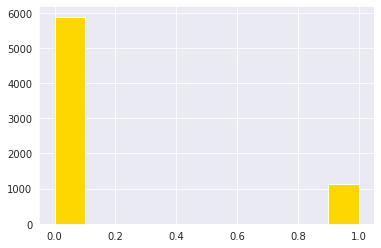

In [10]:
#SeniorCitizen é uma variável categórica com valor numérico
df['SeniorCitizen'].hist()
plt.show()

In [11]:
# Criando função para detectar outliers

def outliers_search(variable):
    fig, axes = plt.subplots(1,2, figsize=(17,5))
    sns.histplot(x=variable,data=df,ax=axes[0])
    sns.boxplot(x=variable,data=df,ax=axes[1])

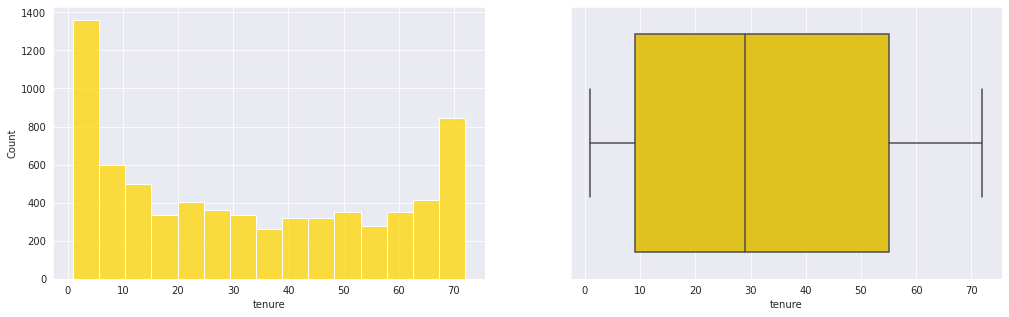

In [12]:
outliers_search('tenure')
# Essa variável aparenta não ter nenhum outlier

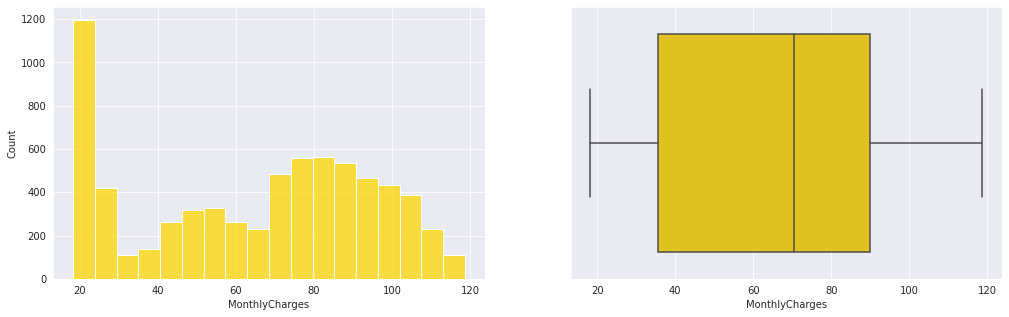

In [13]:
outliers_search('MonthlyCharges')
# Essa variável aparenta não ter nenhum outlier

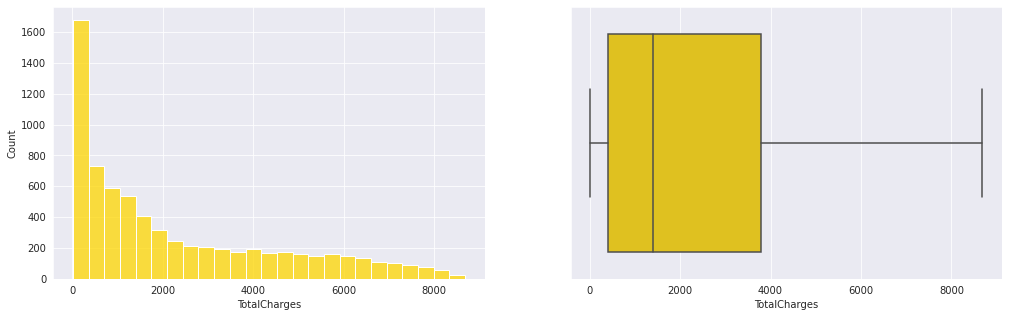

In [14]:
outliers_search('TotalCharges')
# Essa variável aparenta não ter nenhum outlier

- *NOTA*: Como o dataset é composto de clientes que estão na compania por de 1 a 72 meses, o fato de não haver outliers é explicável.

# 3. Exploratory Data Analysis (EDA)

## 3.1 Processamento de Variáveis

In [15]:
print('A coluna customerID tem {} valores únicos, ou seja, um para cada linha. Assim, podemos removê-la.'.format(df['customerID'].nunique()))
df.drop('customerID', axis=1,inplace=True)
print(df.shape[1])

A coluna customerID tem 7032 valores únicos, ou seja, um para cada linha. Assim, podemos removê-la.
20


### Criação da variável Total Services

In [16]:
# Criando um dataframe com todos os 9 serviços possíveis:
services = df[['PhoneService','MultipleLines','InternetService',
               'OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies']]

In [17]:
# Modificando o dataset pra mostrar 1 quando o serviço é contratado, e 0 quando não é

services['PhoneService'] = services['PhoneService'].map({'Yes':1,'No':0})
for item in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
  services[item] = services[item].map({'Yes':1,'No internet service':0,'No':0})
services['MultipleLines'] = services['MultipleLines'].map({'Yes':1,'No':0,'No phone service':0})
services['InternetService'] = services['InternetService'].map({'DSL':1,'Fiber optic':1,'No':0})
services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,0,1,0,1,0,0,0,0
1,1,0,1,1,0,1,0,0,0
2,1,0,1,1,1,0,0,0,0
3,0,0,1,1,0,1,1,0,0
4,1,0,1,0,0,0,0,0,0


In [18]:
# Adicionando os valores de cada linha para criar uma nova coluna
services['total_services'] = services.sum(axis=1)

# Transferindo a coluna para o dataframe original
df = pd.concat([df, services['total_services']], axis=1)

## 3.2 Análise Univariada

### Visualização Geral

In [19]:
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


- *NOTA*: Podemos ver que o número de categorias em cada variável varia de 2 a 4, e geralmente estas categorias têm valores como "Yes" ou "No", então vamos criar algumas divisões para analisar

In [20]:
cat = ['Churn','gender','Partner','Dependents',
       'PhoneService','MultipleLines','PaymentMethod','PaperlessBilling',
       'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
       'TechSupport','StreamingTV','StreamingMovies','Contract']

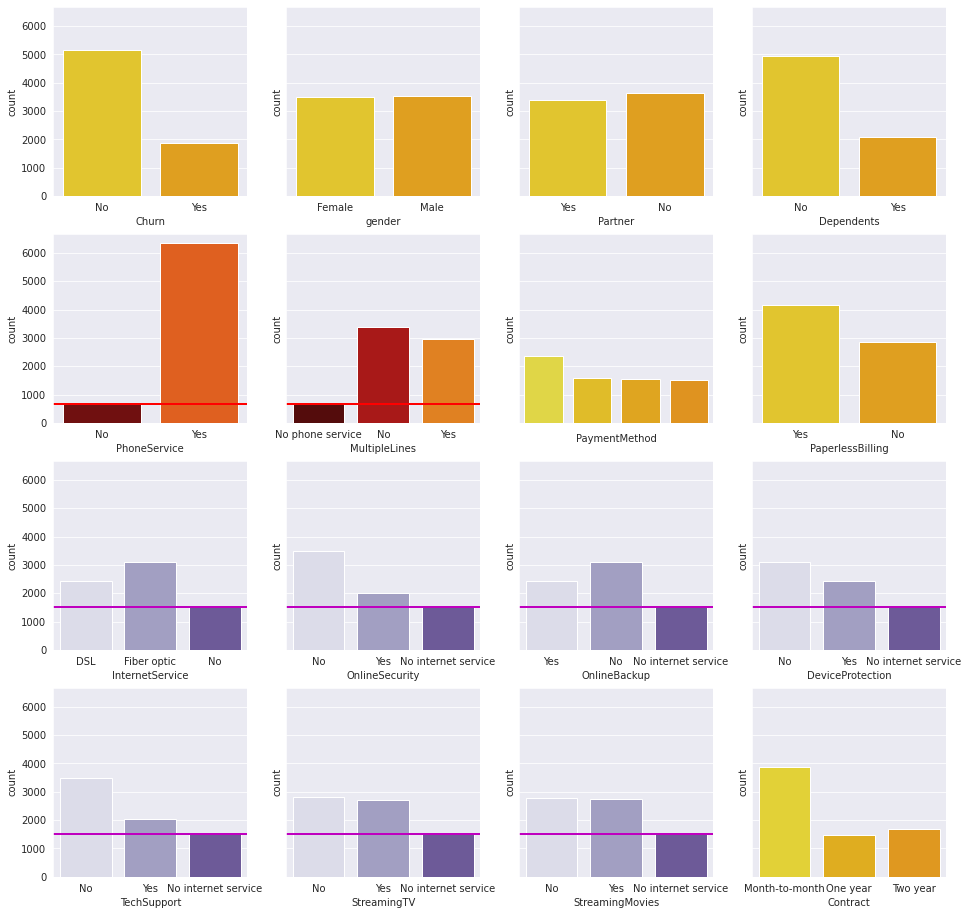

In [21]:
fig, axes = plt.subplots(4,4,figsize=(16,16),sharey=True)

No_Int_Serv = df['InternetService'].value_counts().loc['No']

No_Phone_Serv = df['PhoneService'].value_counts().loc['No']

i = 0
for row in range(4):
    for column in range(4):
        if i in [0,1,2,3,7,15]:
            sns.countplot(x=cat[i],data=df,ax=axes[row,column],palette='Wistia')
        elif i==6:
            g = sns.countplot(x=cat[i],data=df,ax=axes[row,column],palette='Wistia')
            axes[row,column].set_xticklabels('')         
        elif i in [4,5]:
            sns.countplot(x=cat[i],data=df,ax=axes[row,column],palette='gist_heat')
            axes[row,column].axhline(y=No_Phone_Serv,linewidth=2, color='r')
        else:
            sns.countplot(x=cat[i],data=df,ax=axes[row,column],palette='Purples')
            axes[row,column].axhline(y=No_Int_Serv,linewidth=2, color='m')
        i += 1

- *INSIGHT 1*: Através dos gráficos vermelhos, podemos ver claramente que a mesma quantidade é repetida na **coluna "No"** de "PhoneService" e na **coluna "No PhoneService"** de "MultipleLines", mas precisamos verificar se são as mesmas linhas e **não uma coincidência de valores**;
- *INSIGHT 2*: Nos gráficos roxos, o mesmo valor é **repetido em 7 variáveis**, mas como mencionado acima, precisamos saber se é **não é apenas uma coincidência de valores** testando as linhas destas colunas;

In [22]:
pd.crosstab(df['PhoneService'],df['MultipleLines'])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,680,0
Yes,3385,0,2967


- *NOTA*: Como podemos ver, **a suposição estava correta**, sempre que "PhoneService" é "Não", "MultipleLines" é "Sem serviço telefônico"

In [23]:
df[df['InternetService']=='No'][['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].value_counts()

OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies    
No internet service  No internet service  No internet service  No internet service  No internet service  No internet service    1520
dtype: int64

- *NOTA*: Mais uma vez, **a suposição estava correta**, se filtrarmos o conjunto de dados apenas para quando "InternetService" for igual a "Não", as outras 6 variáveis do gráfico roxo são "Sem serviço de Internet"

### Coluna Total de Serviços

Text(0, 0.5, 'Count')

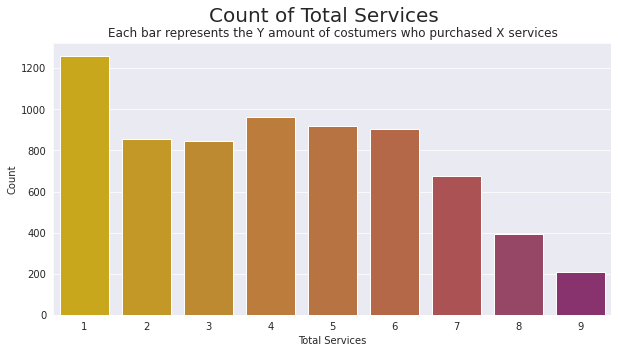

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df['total_services'],palette=sns.color_palette(["#E6B800","#DEA40D","#D69019","#D17C26","#CC6F2E","#C66136","#B84446","#A23A62","#972573","#8C1084"]))
plt.suptitle('Count of Total Services',fontsize=20)
plt.title('Each bar represents the Y amount of costumers who purchased X services')
plt.xlabel('Total Services')
plt.ylabel('Count')

- *NOTA*: Como esperado, há mais clientes que compraram poucos serviços do que clientes que compraram muitos deles.

## 3.3 Análise Bivariada e Multivariada

### Adesão x Modelo de Contrato

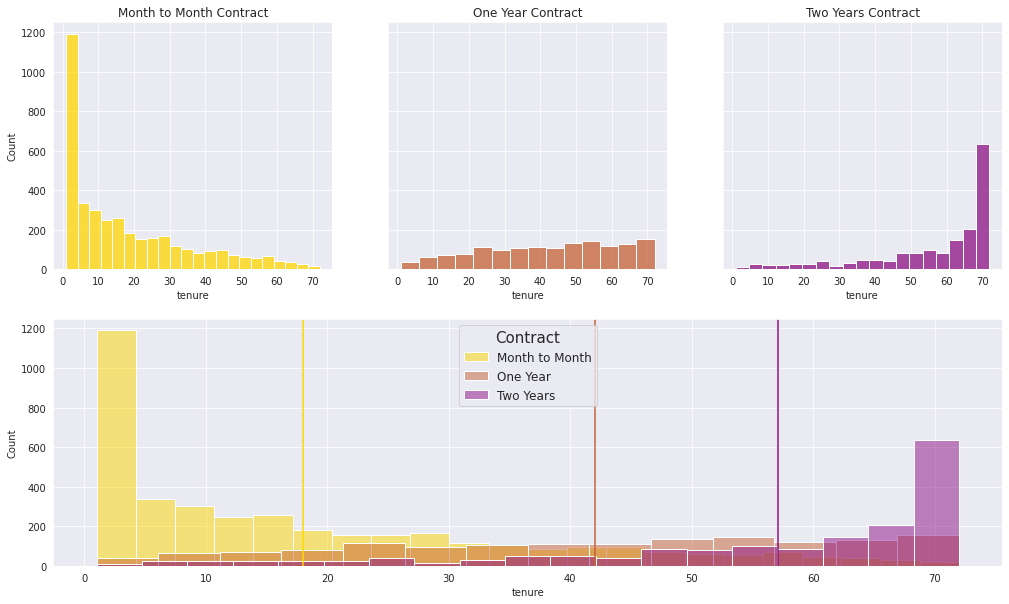

In [25]:
fig, axes = plt.subplots(2,3,figsize=(17,10), sharey=True)
gs = axes[0,1].get_gridspec()
for ax in axes[1,:3]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:3])

sns.histplot(x='tenure',data=df[df['Contract']=='Month-to-month'],ax=axes[0,0])
axes[0,0].set_title('Month to Month Contract')
sns.histplot(x='tenure',data=df[df['Contract']=='One year'],ax=axes[0,1],color="#C66136")
axes[0,1].set_title('One Year Contract')
sns.histplot(x='tenure',data=df[df['Contract']=='Two year'],ax=axes[0,2],color="#8C1084")
axes[0,2].set_title('Two Years Contract')

MtM_mean = df[df['Contract']=='Month-to-month']['tenure'].mean()
OY_mean = df[df['Contract']=='One year']['tenure'].mean()
TY_mean = df[df['Contract']=='Two year']['tenure'].mean()

sns.histplot(x='tenure',data=df[df['Contract']=='Month-to-month'],ax=axbig,alpha=0.5,label='Month to Month')
sns.histplot(x='tenure',data=df[df['Contract']=='One year'],ax=axbig,color="#C66136",alpha=0.5,label='One Year')
sns.histplot(x='tenure',data=df[df['Contract']=='Two year'],ax=axbig,color="#8C1084",alpha=0.5,label='Two Years')
axbig.legend(loc=9,fontsize=12,title="Contract",title_fontsize=15)
plt.axvline(x=MtM_mean)
plt.axvline(x=OY_mean,color="#C66136")
plt.axvline(x=TY_mean,color="#8C1084")



- *NOTA*: Clientes que adquirem um contrato mensal tendem a ficar menos como clientes da Telco, enquanto clientes que contratam a empresa por dois anos tendem a ficar mais tempo;
- *INTERPRETAÇÃO*: Cada linha vertical representa a **média** da distribuição;

### Total de Serviços x Custo Mensal

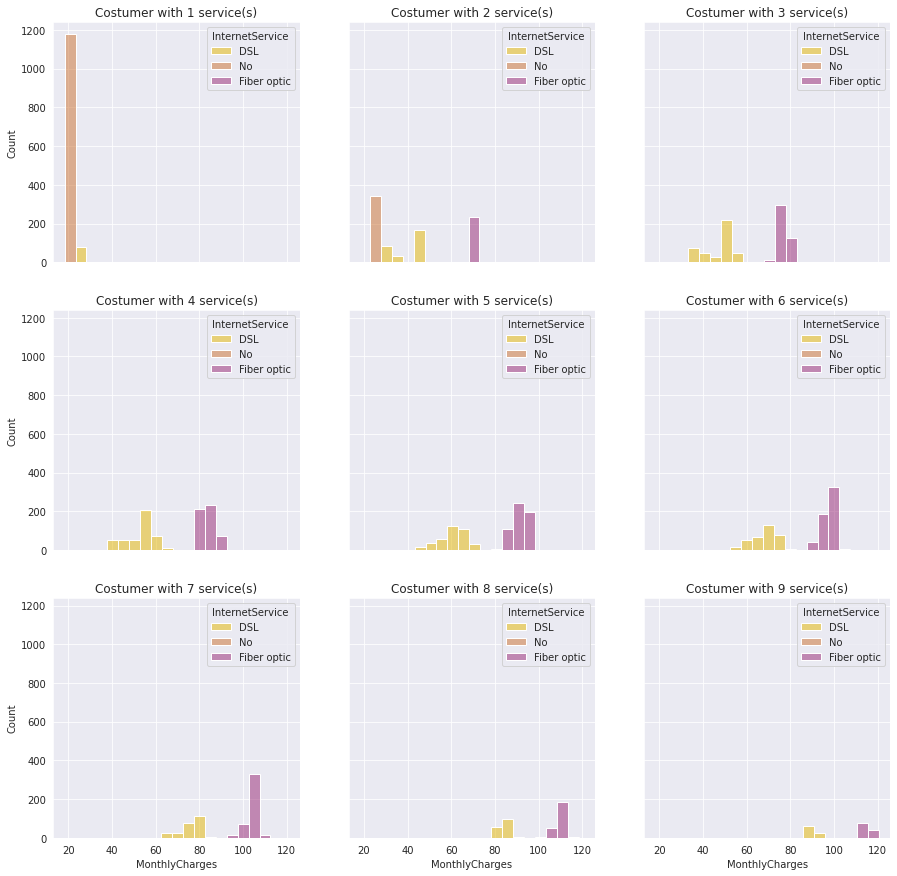

In [26]:
sns.set_palette(sns.color_palette(["#E6B800","#CC6F2E","#972573"]))
fig, axes = plt.subplots(3,3,figsize=(15,15),sharex=True,sharey=True)

i = 1

for row in range(3):
  for column in range(3):
    sns.histplot(data=df[df['total_services']==i],x='MonthlyCharges',
                 ax=axes[row,column],binwidth=5,
                 hue='InternetService',hue_order=['DSL','No','Fiber optic']).set_title('Costumer with {} service(s)'.format(i))
    i += 1

- *INSIGHT 1*: Podemos ver claramente uma correlação entre MontlhyCharges e Total_Services, quanto mais serviços um cliente compra, mais ele paga;
- *INSIGHT 2*: Durante a criação dos gráficos acima, foi observado um espaçamento entre as colunas do histograma da mesma quantidade de serviços, após alguns testes percebemos que quando aplicamos uma divisão de dados com a variável InternetService, os gráficos estão perfeitamente divididos, o que implica
  - Clientes que compram "fibra ótica" tendem a pagar mais que outros clientes (mensalmente), independentemente da quantidade de serviços;


### Serviços totais x Custos totais

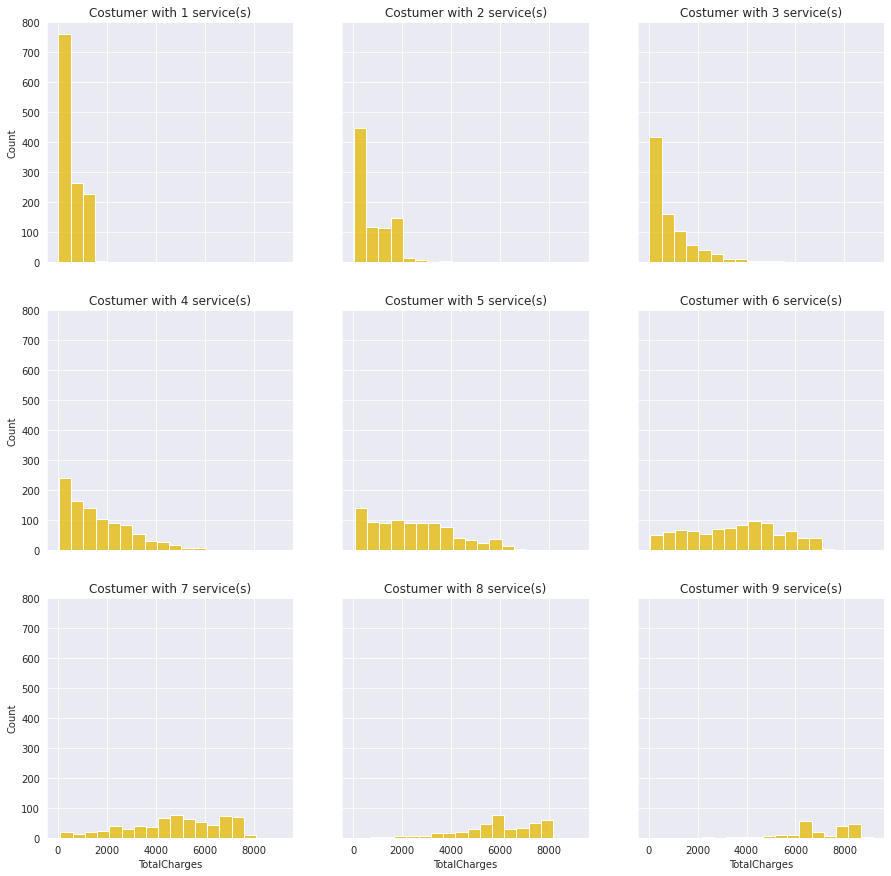

In [27]:
sns.set_palette(sns.color_palette(["#E6B800","#972573"]))
fig, axes = plt.subplots(3,3,figsize=(15,15),sharex=True,sharey=True)

i=1

for row in range(3):
    for column in range(3):
        sns.histplot(data=df[df['total_services']==i],x='TotalCharges',
                    ax=axes[row,column],binwidth=500).set_title('Costumer with {} service(s)'.format(i))
        i+=1

- *NOTA*: Desta vez, podemos observar uma concentração em tarifas mais baixas quando o total de serviços é baixo (menos de 3), e tarifas mais altas quando o total de serviços também é alto (9), mas os valores intermediários têm uma ampla faixa quando comparados com o pagamento mensal;

### Titularidade x Churn

Text(0.5, 1.0, 'Histograma empilhado de contagem de permanência x Churn')

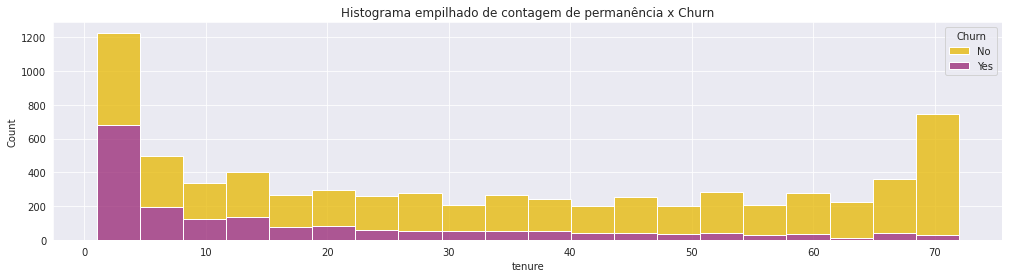

In [28]:
plt.figure(figsize=(17,4))
sns.histplot(data=df,x='tenure',hue='Churn',bins=20,multiple='stack').set_title('Histograma empilhado de contagem de permanência x Churn')

- *INSIGHT*: Aqui fica visível que a incidência de Churn diminui quando os clientes ficam por mais tempo na Telco.

### Relação de Churn com TotalCharges e MonthlyCharges

Text(0.5, 1.0, 'TotalCharges versus Churn')

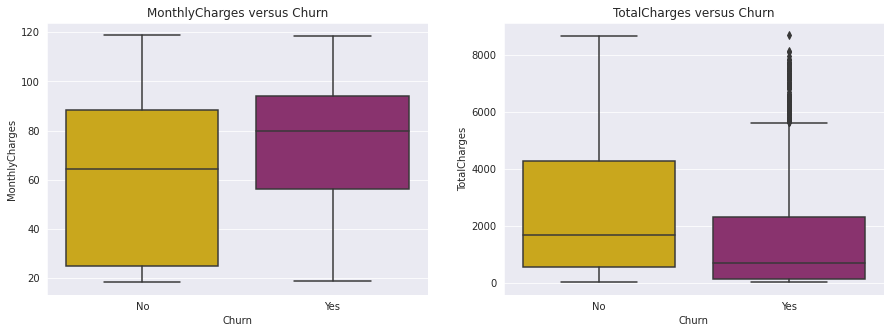

In [29]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df,y='MonthlyCharges',x='Churn',ax=axes[0]).set_title('MonthlyCharges versus Churn')
sns.boxplot(data=df,y='TotalCharges',x='Churn',ax=axes[1]).set_title('TotalCharges versus Churn')

- *INSIGHT 1*: Notamos que a ocorrência de Churn é mais frequente nos altos valores de Mensalidades;
- *INSIGHT 2*: Por outro lado, a ocorrência de Churn quando analisada da perspectiva de TotalCharges ocorre com mais freqüência em valores baixos com alguns outliers superiores;
- Vamos analisá-los a partir de outra perspectiva:

Text(0.5, 1.0, 'MonthlyCharges x Total Charges c/ hue=Churn')

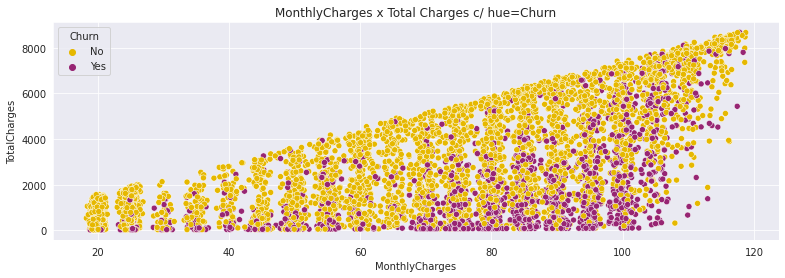

In [30]:
plt.figure(figsize = (13,4))
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Churn').set_title('MonthlyCharges x Total Charges c/ hue=Churn')

- *NOTA*: Podemos ver mais claramente que a ocorrência de Churn é mais frequente nos baixos valores de TotalCharges (isto independentemente dos valores de MonthlyCharges)
- Isto pode estar relacionado ao fato de que o Churn ocorre mais frequentemente quando a pessoa fica menos na Telco, o que leva a pessoa a ter uma TotalCharge mais baixo;

## 3.4 Validação de Hipótese

In [31]:
# Proporção de Z-Test para 2 amostras
def proportion(dfx,lista,z_base):
  # Calculating information of Sample 1:
  churn_1 = dfx['Yes'][0]
  n_1 = dfx.sum(axis=1)[0]
  proportion_1 = n_1/df.shape[0]

  # Calculando para a amostra 2:
  churn_2 = dfx['Yes'][1]
  n_2 = dfx.sum(axis=1)[1]
  proportion_2 = n_2/df.shape[0]

  # Criando uma tabela com estatísticas das amostras:
  df_stats = pd.DataFrame([[churn_1,n_1,proportion_1],
                           [churn_2,n_2,proportion_2]],
                           index = lista,
                           columns = ['X','n','proportion'])
  print(df_stats)
  print('\n')
  p_bar = (proportion_1*n_1+proportion_2*n_2)/df.shape[0]
  z = (proportion_1-proportion_2)/np.sqrt(p_bar*(1-p_bar)*(1/n_1+1/n_2))
  if np.absolute(z) > z_base:
    print('Como o p-valor < alpha, H0 é rejeitada!')
  elif np.absolute(z) < z_base:
    print("Como o p-vaor > alpha, não podemos rejeitar H0.")

def mean(dfx,lista):
  # Normalizando e calculando a informação para a Amostra 1:
  churn_1 = normalize(dfx,norm='l1')[0,1]
  n_1 = dfx.sum(axis=1)[0]
  sigma_1 = np.sqrt(churn_1*(1-churn_1))

  # Calculando para a amostra 2:
  churn_2 = normalize(dfx,norm='l1')[1,1]
  n_2 = dfx.sum(axis=1)[1]
  sigma_2 = np.sqrt(churn_2*(1-churn_2))

  # Criando uma tabela com estatísticas das amostras:
  df_stats = pd.DataFrame([[churn_1,n_1,sigma_1],
                            [churn_2,n_2,sigma_2]],
                            index = lista,
                            columns = ['X_bar','n','sigma'])
  print(df_stats)
  print('\n')
  z = (churn_1-churn_2)/np.sqrt(((sigma_1**2)/n_1)+((sigma_2**2)/n_2))
  print('O z-score encontrado é {}'.format(z))

### $H_{1}:$ A ocorrência de Churn não é igual em homens e mulheres (Churn dependente do sexo)
- **RESULT**: Falha ao rejeitar $H_{0}$

- $H_{0}:p_{homens}=p_{mulheres}$
- $H_{1}:p_{homens}\neq p_{mulheres}$ 
- $\alpha = 0.05 = 5\% \therefore z=1.96$
- Assumindo que $H_{0}$ seja verdadeira:

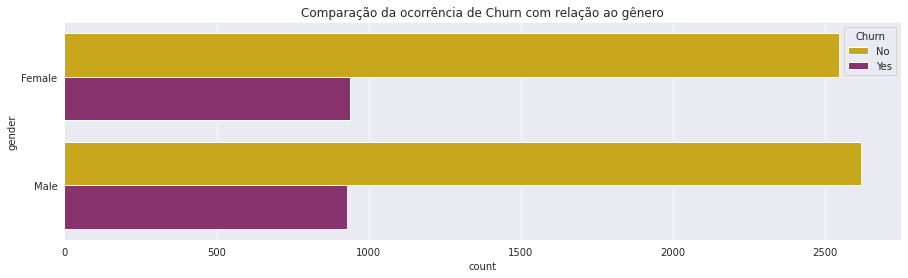

In [32]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,y='gender',hue='Churn').set_title('Comparação da ocorrência de Churn com relação ao gênero')
plt.show()

In [33]:
df_h1 = pd.crosstab(df['gender'],df['Churn'])
df_h1.index.name,df_h1.columns.name = (' ',' ')
df_h1

,No,Yes
,,
Female,2544,939
Male,2619,930


In [34]:
proportion(df_h1,['Female','Male'],1.96)

          X     n  proportion
Female  939  3483    0.495307
Male    930  3549    0.504693


Como o p-vaor > alpha, não podemos rejeitar H0.


### $H_{2}:$ A ocorrência de Churn é maior no primeiro ano das pessoas como clientes do que em mais tempo do que isto

- $H_{0}:p_{primeiro_ano} \leq p_{mais_tempo} \Rightarrow p_{primeiro_ano}-p_{mais-tempo} \leq 0$
- $H_{2}:p_{primeiro_ano} > p_{mais-tempo} \Rightarrow p_{primeiro_ano}-p_{mais-tempo} > 0$ 
- $\alpha = 0.05 = 5\% \therefore z=1.645$
- Assumindo $H_{0}$ como verdadeira:

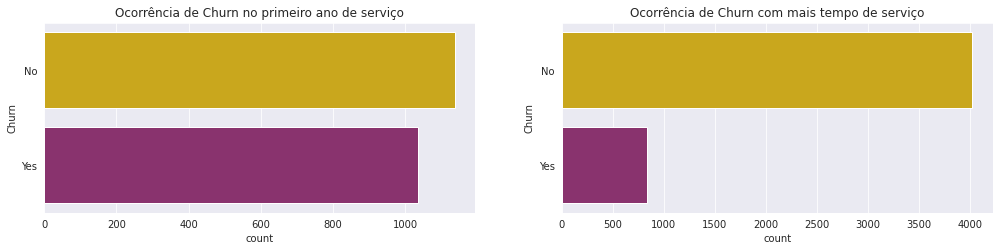

In [35]:
fig, axes = plt.subplots(1,2,figsize=(17,3.5))

sns.countplot(data=df[df['tenure']<=12],y='Churn',ax=axes[0]).set_title('Ocorrência de Churn no primeiro ano de serviço')

sns.countplot(data=df[df['tenure']>12],y='Churn',ax=axes[1]).set_title('Ocorrência de Churn com mais tempo de serviço')
plt.show()

In [36]:
df_h2 = pd.DataFrame([pd.crosstab(df[df['tenure']<=12]['tenure'],df[df['tenure']<=12]['Churn']).sum(),
                      pd.crosstab(df[df['tenure']>12]['tenure'],df[df['tenure']>12]['Churn']).sum()],
                      index = ['Primeiro ano','Mais Tempo'])
df_h2.columns.name = ' '
df_h2

,No,Yes
Primeiro ano,1138,1037
Mais Tempo,4025,832


In [37]:
proportion(df_h2,['Primeiro Ano','Mais tempo'],1.645)

                 X     n  proportion
Primeiro Ano  1037  2175      0.3093
Mais tempo     832  4857      0.6907


Como o p-valor < alpha, H0 é rejeitada!


- Como esperado ao olhar para o gráfico, o valor p é menor que $\alpha$, o que nos garante que podemos rejeitar a hipótese nula e aceitar a hipótese 2 como verdadeira;

### $H_{3}:$ A proporção de ocorrência de Churn é maior quando os clientes são Sênior

- $H_{0}:p_{sênior} \leq p_{não-sênior} \Rightarrow p_{sênior} - p_{não-sênior} \leq 0$
- $H_{3}:p_{sênior} > p_{não-sênior} \Rightarrow p_{sênior} - p_{não-sênior} > 0$ 
- $\alpha = 0.05 = 5\% \therefore z=1.645$
- Assumindo que $H_{0}$ seja verdadeira:

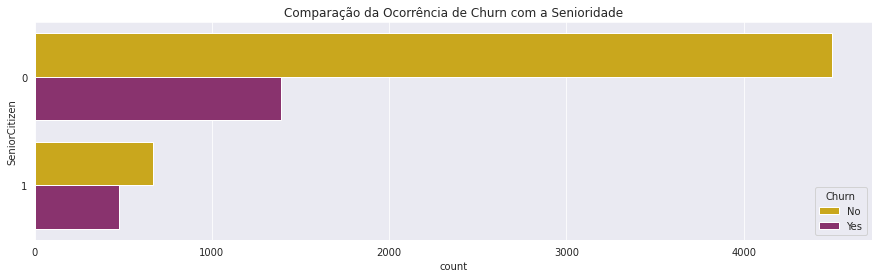

In [38]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,y='SeniorCitizen',hue='Churn').set_title('Comparação da Ocorrência de Churn com a Senioridade')
plt.show()

In [39]:
df_h3 = pd.crosstab(df['SeniorCitizen'],df['Churn'])
df_h3.index.name,df_h3.columns.name = (' ',' ')
df_h3.index = ['Não é sênior','Sênior']
df_h3

,No,Yes
Não é sênior,4497,1393
Sênior,666,476


In [40]:
proportion(df_h3,['Not Senior','Senior'],1.645)

               X     n  proportion
Not Senior  1393  5890      0.8376
Senior       476  1142      0.1624


Como o p-valor < alpha, H0 é rejeitada!


### $H_{4}:$ A proporção de ocorrência de Churn é maior quando os clientes não têm parceiros

- $H_{0}:p_{sem-parceiros} \leq p_{parceiros} \Rightarrow p_{sem-parceiros} - p_{parceiros} \leq 0$
- $H_{4}:p_{sem-parceiros} > p_{parceiros} \Rightarrow p_{sem-parceiros} - p_{parceiros} > 0$ 
- $\alpha = 0.05 = 5\% \therefore z=1.645$
- Assumindo que $H_{0}$ seja verdadeira:

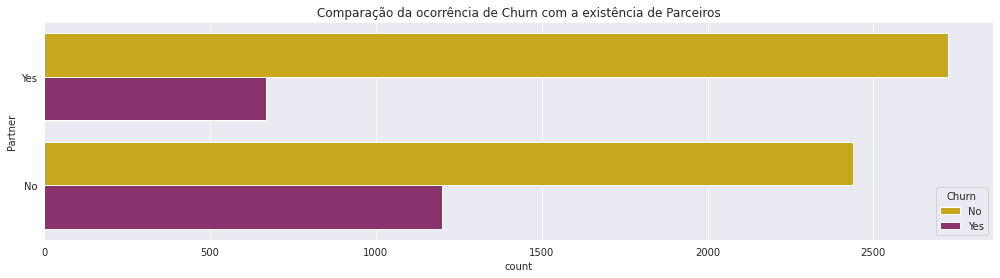

In [41]:
plt.figure(figsize = (17,4))
sns.countplot(data=df,y='Partner',hue='Churn').set_title('Comparação da ocorrência de Churn com a existência de Parceiros')
plt.show()

In [42]:
df_h4 = pd.crosstab(df['Partner'],df['Churn'])
df_h4.index.name,df_h4.columns.name = (' ',' ')
df_h4.index = ['C/ Parceiro','S/ Parceiro']
df_h4

,No,Yes
C/ Parceiro,2439,1200
S/ Parceiro,2724,669


In [43]:
proportion(df_h4,['C/ Parceiro','S/ Parceiro'],1.645)

                X     n  proportion
C/ Parceiro  1200  3639    0.517491
S/ Parceiro   669  3393    0.482509


Como o p-valor < alpha, H0 é rejeitada!


### $H_{5}:$ A proporção de ocorrência de Churn é maior quando os clientes não têm dependentes

- $H_{0}:p_{sem-dependentes} \leq p_{com-dependentes} \Rightarrow p_{sem-dependentes} - p_{com-dependentes} \leq 0$
- $H_{5}:p_{sem-dependentes} > p_{com-dependentes} \Rightarrow p_{sem-dependentes} - p_{com-dependentes} > 0$ 
- $\alpha = 0.05 = 5\% \therefore z=1.645$
- Assumindo que $H_{0}$ seja verdadeira:

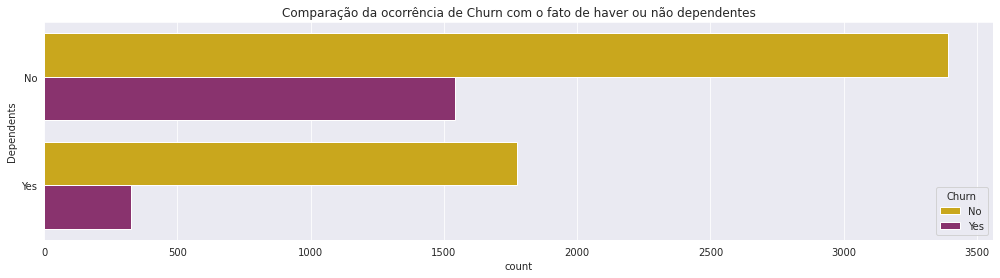

In [44]:
plt.figure(figsize = (17,4))
sns.countplot(data=df,y='Dependents',hue='Churn').set_title('Comparação da ocorrência de Churn com o fato de haver ou não dependentes')
plt.show()

In [45]:
df_h5 = pd.crosstab(df['Dependents'],df['Churn'])
df_h5.index.name,df_h5.columns.name = (' ',' ')
df_h5.index = ['Com Dependentes','Sem Dependentes']
df_h5

,No,Yes
Com Dependentes,3390,1543
Sem Dependentes,1773,326


In [46]:
proportion(df_h5,['Sem Dependentes','Com Dependentes'],1.645)

                    X     n  proportion
Sem Dependentes  1543  4933    0.701507
Com Dependentes   326  2099    0.298493


Como o p-valor < alpha, H0 é rejeitada!


### $H_{6}:$ A proporção de ocorrência de Churn é maior quando os clientes têm serviço telefônico

- $H_{0}:p_{serviçotelef} \leq p_{sem-serviçotelef} \Rightarrow p_{serviçotelef} - p_{sem-serviçotelef} \leq 0$
- $H_{6}:p_{serviçotelef} > p_{sem-serviçotelef} \Rightarrow p_{serviçotelef} - p_{sem-serviçotelef} > 0$ 
- $\alpha = 0.05 = 5\% \therefore z=1.645$
- Assumindo $H_{0}$ como verdadeira:

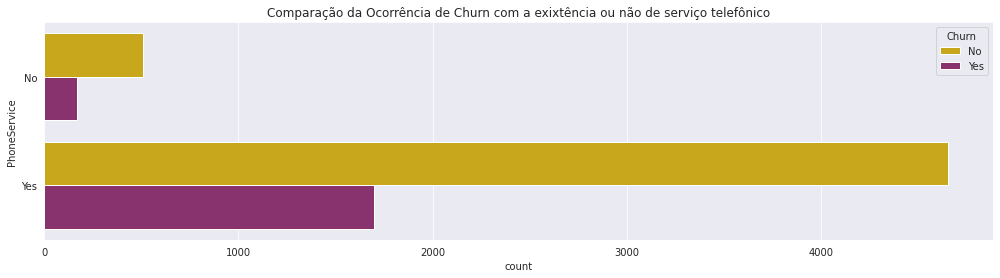

In [47]:
plt.figure(figsize = (17,4))
sns.countplot(data=df,y='PhoneService',hue='Churn').set_title('Comparação da Ocorrência de Churn com a exixtência ou não de serviço telefônico')
plt.show()

In [48]:
df_h6 = pd.crosstab(df['PhoneService'],df['Churn'])
df_h6.index.name,df_h6.columns.name = (' ',' ')
df_h6.index = ['S/ Serviço Telefônico','C/ Serviço Telefônico']
df_h6

,No,Yes
S/ Serviço Telefônico,510,170
C/ Serviço Telefônico,4653,1699


In [49]:
proportion(df_h6,['S/ Serviço Telefônico','C/ Serviço Telefônico'],1.645)

                          X     n  proportion
S/ Serviço Telefônico   170   680    0.096701
C/ Serviço Telefônico  1699  6352    0.903299


Como o p-valor < alpha, H0 é rejeitada!


# 4. Processamento de Dados

## 4.1 Feature Engineering

In [50]:
internetservice = pd.get_dummies(df['InternetService'],prefix='InternetService').drop('InternetService_No',axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


### Codificando **DeviceProtection, TechSupport, OnlineSecurity, OnlineBackup, Streaming TV and StreamingMovies**

In [51]:
for i in ['DeviceProtection','TechSupport','OnlineSecurity','OnlineBackup','StreamingTV','StreamingMovies']:
  internetservice = pd.concat([internetservice,pd.get_dummies(df[i],prefix=i).drop('{}_No internet service'.format(i),axis=1)],axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
1,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,1,0,1,0,1,0,0,1,0,1,1,0,1,0
3,1,0,0,1,0,1,0,1,1,0,1,0,1,0
4,0,1,1,0,1,0,1,0,1,0,1,0,1,0


### Codificando **gender,Partner,Dependents,PhoneService,Contract,PaperlessBilling,PaymentMethods**

In [52]:
for i in ['gender','Partner','Dependents','PhoneService','Contract','PaperlessBilling','PaymentMethod']:
  internetservice = pd.concat([internetservice,pd.get_dummies(df[i],prefix=i,drop_first=True)],axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1
2,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
4,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0


### Codificando a coluna **MultipleLines**

In [53]:
internetservice = pd.concat([internetservice,pd.get_dummies(df['MultipleLines'],prefix='MultiLines').drop('MultiLines_No phone service',axis=1)],axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultiLines_No,MultiLines_Yes
0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0
2,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0
3,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0


### Codificando a coluna **Churn**

In [54]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

## 4.2 Dataset Splitting

In [55]:
internetservice = pd.concat([internetservice,df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']]],axis=1)
internetservice.columns

Index(['InternetService_DSL', 'InternetService_Fiber optic',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultiLines_No', 'MultiLines_Yes', 'SeniorCitizen', 'tenure',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(internetservice.drop('Churn',axis=1),
                                                    internetservice['Churn'])

### Análise de Correlação

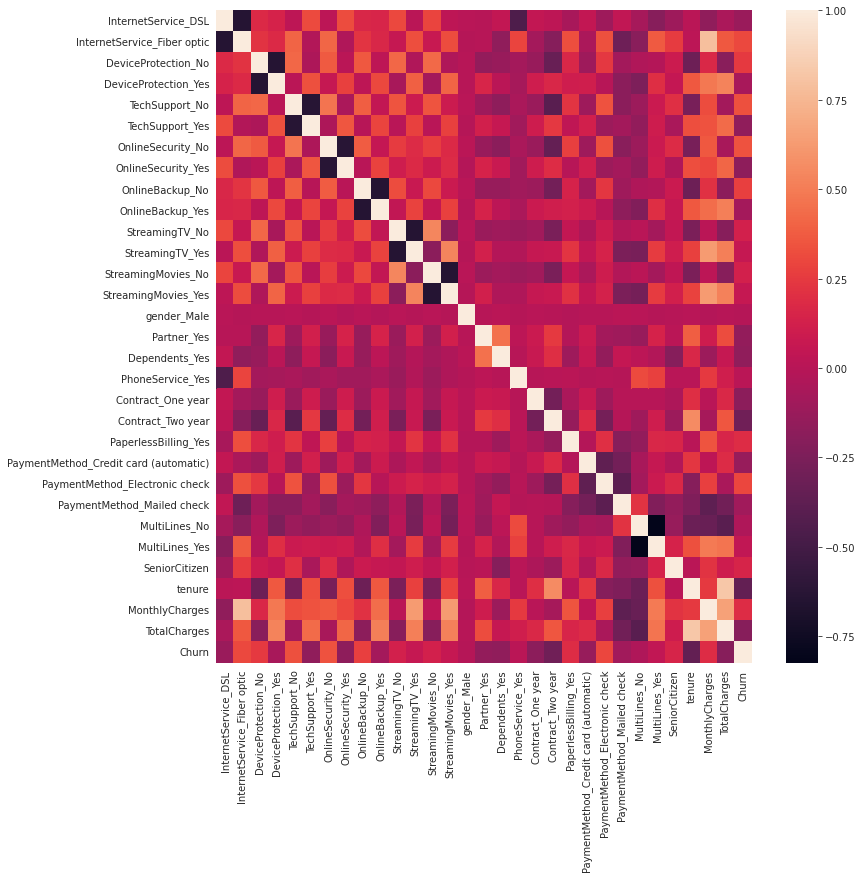

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(internetservice.corr())

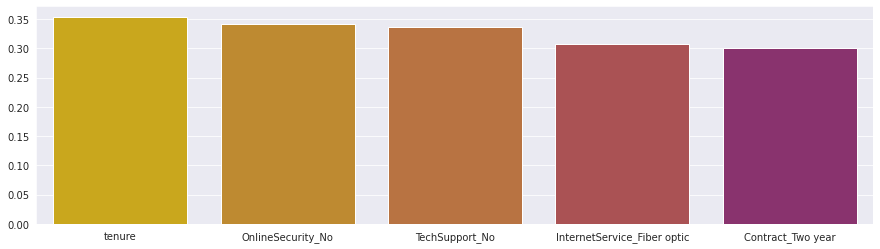

In [58]:
top_corr = abs(internetservice.corr()['Churn']).sort_values(ascending=False)[1:6]

plt.figure(figsize=(15,4))
sns.barplot(y=top_corr.values,x=top_corr.index,palette=sns.color_palette(["#E6B800","#D69019","#CC6F2E","#B84446","#972573"]))

- *NOTA*: Olhando para o eixo y, notamos que as 5 principais correlações mostradas acima têm seus valores entre 0,3 e 0,35 (que são correlações relativamente baixas).

In [59]:
tail_corr = abs(internetservice.corr()['Churn']).sort_values(ascending=False)[-10:]
tail_corr

InternetService_DSL           0.124141
PaymentMethod_Mailed check    0.090773
OnlineBackup_Yes              0.082307
DeviceProtection_Yes          0.066193
StreamingTV_Yes               0.063254
StreamingMovies_Yes           0.060860
MultiLines_Yes                0.040033
MultiLines_No                 0.032654
PhoneService_Yes              0.011691
gender_Male                   0.008545
Name: Churn, dtype: float64

- Acima temos as 10 características que menos se correlacionam com a variável Churn

## 4.3 Feature Scalling

In [60]:
sc = StandardScaler()

In [61]:
X_train[['tenure','MonthlyCharges','TotalCharges']] = sc.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultiLines_No,MultiLines_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5473,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,1,1,0,0,1,0,1,0,1,0,0,-0.492655,-0.507710,-0.584160
3714,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0,1.508552,-0.168649,0.798523
3403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,-1.146110,-1.481468,-0.962707
4653,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,-0.084245,-0.454262,-0.309531
5766,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,-0.370132,-0.160298,-0.404218


In [62]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = sc.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
X_test.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultiLines_No,MultiLines_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6132,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1.426870,-0.380771,0.581741
5257,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,0.201642,1.212649,0.654583
5746,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,-0.901064,0.541208,-0.637941
3957,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,0,1.263506,1.262757,1.782207
7015,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0.079119,0.681509,0.270448


- *Explicação*: Não vamos ajustar o X_test (apenas transformá-lo) porque são considerados dados novos, e se não os vimos antes, não faz sentido que os dados já estejam ajustados;

# 5. Machine Learning Modeling

## 5.1 **[Primeiro ciclo]** Modelagem com conjunto de dados desequilibrado

### Criando Modelos

#### Baseline

- O modelo de base fornecerá métricas comparativas previstas a partir dos dados de uma maneira simples;
- A técnica de validação cruzada será utilizada em todos os modelos a serem testados;
- A matriz de confusão será usada quando testarmos o modelo final com os dados de teste reservados;

In [63]:
base_classifier = DummyClassifier(random_state=1)

In [64]:
# Criando o baseline para métricas
baseline = []

# 'cross-validando' o modelo
cv_result = cross_validate(base_classifier, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Anexando métricas bara a lista de base
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  baseline.append(cv_result[i].mean())


baseline

[0.7288583175205565, 0.0, 0.0, 0.0, 0.5]

#### Regressão Logística

In [65]:
classifierLR = LogisticRegression(random_state = 1)

In [66]:
# Criando a lista de métricas para a regressão logística
logistic_regression = []

# Validando o modelo
cv_result = cross_validate(classifierLR, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Anexando métricas bara a lista de base
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  logistic_regression.append(cv_result[i].mean())

logistic_regression

[0.800905640848715,
 0.6603002586587301,
 0.5524475524475525,
 0.6009482172344263,
 0.8427133401636242]

#### N Nearest Neighbors (KNN)

In [67]:
classifierKNN = KNeighborsClassifier()

In [68]:
# Criando a lista de métricas KNN
knn = []

# Validando o modelo
cv_result = cross_validate(classifierKNN, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Anexando métricas à lista KNN
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  knn.append(cv_result[i].mean())

knn

[0.7601435368868955,
 0.5633477323191922,
 0.513986013986014,
 0.5373499376547406,
 0.7712638237709261]

#### Support Vector Machine (SVM)

In [69]:
classifierSVM = SVC(random_state=0)

In [70]:
# Criando a lista de métricas SVM
svm = []

# Validação do modelo
cv_result = cross_validate(classifierSVM, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Adicionando métricas à lista SVM
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  svm.append(cv_result[i].mean())

svm

[0.7984417227301478,
 0.6798277393552855,
 0.4902097902097903,
 0.5686536233789393,
 0.7922765988746102]

Naive Bayes

In [71]:
classifierNB = GaussianNB()

In [72]:
# Criando a lista de métricas
naive_bayes = []

# Validando o modelo
cv_result = cross_validate(classifierNB, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Adicionando métricas à lista
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  naive_bayes.append(cv_result[i].mean())

naive_bayes

[0.7463026852969927,
 0.5228557638007613,
 0.7545454545454545,
 0.6174150504229888,
 0.8241450240100807]

#### Decision Tree

In [73]:
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [74]:
# Criando a lista de métricas
decision_tree = []

# Validando o modelo
cv_result = cross_validate(classifierDT, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Adicionando métricas à lista
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  decision_tree.append(cv_result[i].mean())

decision_tree

[0.7267749841872233,
 0.495836809317697,
 0.5055944055944056,
 0.5000924810885611,
 0.657688374598886]

#### Random Forest

In [75]:
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [76]:
random_forest = []

cv_result = cross_validate(classifierRF, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  random_forest.append(cv_result[i].mean())

random_forest

[0.7679180323155654,
 0.6043555461636713,
 0.41538461538461535,
 0.4914938368127415,
 0.7886293796165955]

#### XG Boost

In [77]:
classifierXGB = XGBClassifier()

In [78]:
XGB = []

cv_result = cross_validate(classifierXGB, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  XGB.append(cv_result[i].mean())

XGB

[0.8009013282732449,
 0.6701559854053428,
 0.5272727272727271,
 0.5897423386316012,
 0.8452216391562981]

### Comparação dos Modelos de Classificação

In [79]:
metrics = (pd.DataFrame([baseline,logistic_regression,knn,svm,naive_bayes,decision_tree,random_forest,XGB],
                        index=['Baseline','Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree','Random Forest','XG Boost'],
                        columns=['Accuracy','Precision','Recall','F1 Score','AUROC'])*100).round(2)

metrics

,Accuracy,Precision,Recall,F1 Score,AUROC
Baseline,72.89,0.00,0.00,0.00,50.00
Logistic Regression,80.09,66.03,55.24,60.09,84.27
KNN,76.01,56.33,51.40,53.73,77.13
SVM,79.84,67.98,49.02,56.87,79.23
Naive Bayes,74.63,52.29,75.45,61.74,82.41
Decision Tree,72.68,49.58,50.56,50.01,65.77
Random Forest,76.79,60.44,41.54,49.15,78.86
XG Boost,80.09,67.02,52.73,58.97,84.52


- Para nosso problema de negócios, o mais importante é prever corretamente os clientes que provavelmente sairão da Telco (Verdadeiros Positivos) e minimizar o número de pessoas classificadas erroneamente como não prováveis de sair (Falsos Negativos).
- Por causa disso, a principal métrica a ser usada será a Recall, não usaremos a pontuação F1 porque não há tantos problemas em classificar como provável de deixar as pessoas que não deixarão mais a empresa (Falsos Positivos)

In [80]:
metrics['Recall'].sort_values(ascending=False)

Naive Bayes            75.45
Logistic Regression    55.24
XG Boost               52.73
KNN                    51.40
Decision Tree          50.56
SVM                    49.02
Random Forest          41.54
Baseline                0.00
Name: Recall, dtype: float64

- Podemos ver acima que o modelo Naive Bayes tem um Recall muito acima dos demais. Portanto, vamos refiná-lo

### Melhorando o modelo Naive Bayes

In [81]:
tuned_classifierNB = GaussianNB()

# Parâmetros a serem usados
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=tuned_classifierNB, 
                 param_grid=params_NB, 
                 cv=10, 
                 scoring='recall')

# Ajustando o modelo aos dados de teste
gs_NB.fit(X_train, y_train)

# Imprimindo o melhor resultado com o aprimoramento
best_recall = gs_NB.best_score_
print("Melhor resultado de F1: {:.2f} %".format(best_recall*100))

# Printing the best parameter found
best_parameters = gs_NB.best_params_
print("Melhores parâmetros:", best_parameters)

Melhor resultado de F1: 76.22 %
Melhores parâmetros: {'var_smoothing': 0.1}


In [82]:
metrics.loc['Naive Bayes']

Accuracy     74.63
Precision    52.29
Recall       75.45
F1 Score     61.74
AUROC        82.41
Name: Naive Bayes, dtype: float64

- O modelo Naive Bayes não melhorou muito, e olhando para suas outras métricas, percebemos que elas são relativamente baixas, portanto pode ser necessário equilibrar o conjunto de dados

## 5.2 **[Segundo Ciclo]** Equilibrando o Dataset com a Técnica SMOTE

### Balanceamento de Dados

In [83]:
smote = SMOTE()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(internetservice.drop('Churn',axis=1),
                                                    internetservice['Churn'])

In [85]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [86]:
X_train = sc.fit_transform(X_train)
X_train_smote = sc.fit_transform(X_train_smote)
X_test = sc.transform(X_test)

In [87]:
print('Antes do SMOTE: {} linhas'.format(X_train.shape[0]))
print('Depois do SMOTE: {} linhas'.format(X_train_smote.shape[0]))

Antes do SMOTE: 5274 linhas
Depois do SMOTE: 7724 linhas


### Criando os Modelos

#### Baseline

- O modelo de base fornecerá métricas comparativas previstas a partir dos dados de uma maneira simples;
- A técnica de validação cruzada será utilizada em todos os modelos a serem testados;
- A matriz de confusão será usada quando testarmos o modelo final com os dados de teste reservados;

In [88]:
base_classifier = DummyClassifier(random_state=1)

In [89]:
# Criando a lista de métricas base
baseline = []

# Validação cruzada do modelo
cv_result = cross_validate(base_classifier, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Anexando métricas à lista de base
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  baseline.append(cv_result[i].mean())

baseline

[0.49974126778783956, 0.09987063389391979, 0.2, 0.13321829163071613, 0.5]

#### Regressão Logística

In [90]:
classifierLR = LogisticRegression(random_state = 1)

In [91]:
logistic_regression = []

cv_result = cross_validate(classifierLR, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  logistic_regression.append(cv_result[i].mean())

logistic_regression

[0.8316073906253143,
 0.8338548467376758,
 0.8255619820326411,
 0.8218208289463267,
 0.9276515027751989]

#### N Nearest Neighbors (KNN)

In [92]:
classifierKNN = KNeighborsClassifier()

In [93]:
knn = []

cv_result = cross_validate(classifierKNN, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  knn.append(cv_result[i].mean())

knn

[0.8171108459738988,
 0.802315674987392,
 0.8346233147233267,
 0.8116616080936987,
 0.8953944526058761]

#### Support Vector Machine (SVM)

In [94]:
classifierSVM = SVC(random_state=0)

In [95]:
svm = []

cv_result = cross_validate(classifierSVM, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  svm.append(cv_result[i].mean())

svm

[0.8300637111315178,
 0.842446958367654,
 0.8058875902049778,
 0.813218658619378,
 0.9192456114355221]

#### Naive Bayes

In [96]:
classifierNB = GaussianNB()

In [97]:
naive_bayes = []

cv_result = cross_validate(classifierNB, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  naive_bayes.append(cv_result[i].mean())

naive_bayes

[0.7931340447352018,
 0.7672649086595206,
 0.8402772757092555,
 0.8000595354856127,
 0.8663944501432257]

#### Decicion Tree

In [98]:
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [99]:
decision_tree = []

cv_result = cross_validate(classifierDT, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  decision_tree.append(cv_result[i].mean())

decision_tree

[0.8040393393614812,
 0.7957419855280536,
 0.8084755860813218,
 0.7943537542285506,
 0.804236494079268]

#### Random Forest

In [100]:
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [101]:
random_forest = []

cv_result = cross_validate(classifierRF, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  random_forest.append(cv_result[i].mean())

random_forest

[0.843792270207589,
 0.8590342788104277,
 0.8149475840462707,
 0.825616649859878,
 0.9188447682517603]

#### XG Boost

In [102]:
classifierXGB = XGBClassifier()

In [103]:
XGB = []

cv_result = cross_validate(classifierXGB, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  XGB.append(cv_result[i].mean())

XGB

[0.8406713966847421,
 0.8308072354648793,
 0.8524922681447563,
 0.8341443782279093,
 0.9310632812368305]

### Comparação dos modelos de classificação

In [104]:
metrics = (pd.DataFrame([baseline,logistic_regression,knn,svm,naive_bayes,decision_tree,random_forest,XGB],
                        index=['Baseline','Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree','Random Forest','XG Boost'],
                        columns=['Accuracy','Precision','Recall','F1 Score','AUROC'])*100).round(2)

metrics

,Accuracy,Precision,Recall,F1 Score,AUROC
Baseline,49.97,9.99,20.00,13.32,50.00
Logistic Regression,83.16,83.39,82.56,82.18,92.77
KNN,81.71,80.23,83.46,81.17,89.54
SVM,83.01,84.24,80.59,81.32,91.92
Naive Bayes,79.31,76.73,84.03,80.01,86.64
Decision Tree,80.40,79.57,80.85,79.44,80.42
Random Forest,84.38,85.90,81.49,82.56,91.88
XG Boost,84.07,83.08,85.25,83.41,93.11


In [105]:
metrics['Recall'].sort_values(ascending=False)

XG Boost               85.25
Naive Bayes            84.03
KNN                    83.46
Logistic Regression    82.56
Random Forest          81.49
Decision Tree          80.85
SVM                    80.59
Baseline               20.00
Name: Recall, dtype: float64

#### Aprimorando o modelo KNN

In [106]:
tuned_classifierKNN = KNeighborsClassifier()

params_KNN = dict(leaf_size = list(range(1,25)),
                  n_neighbors = list(range(1,15)),
                  p = [1,2])

gs_KNN = GridSearchCV(estimator=tuned_classifierKNN, 
                      param_grid=params_KNN, 
                      cv=10, 
                      scoring='recall')

gs_KNN.fit(X_train_smote, y_train_smote)

best_recall = gs_KNN.best_score_
print("Melhor pontuação de Recall: {:.2f} %".format(best_recall*100))

best_parameters = gs_KNN.best_params_
print("Melhores parâmetros:", best_parameters)

Melhor pontuação de Recall: 86.59 %
Melhores parâmetros: {'leaf_size': 1, 'n_neighbors': 13, 'p': 1}


#### Criando Predições

In [107]:
final_classifierKNN = KNeighborsClassifier(leaf_size = 1,
                                           n_neighbors = 13,
                                           p = 2)

final_classifierKNN.fit(X_train_smote,y_train_smote)

y_predKNN = final_classifierKNN.predict(X_test)

knn_corr = confusion_matrix(y_test, y_predKNN, normalize='true')

print(classification_report(y_test, y_predKNN))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1301
           1       0.52      0.66      0.58       457

    accuracy                           0.75      1758
   macro avg       0.69      0.72      0.70      1758
weighted avg       0.78      0.75      0.76      1758



In [108]:
classifierXGB.fit(X_train_smote,y_train_smote)

y_predXGB = classifierXGB.predict(X_test)

xgb_corr = confusion_matrix(y_test, y_predXGB, normalize='true')

print(classification_report(y_test, y_predXGB))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1301
           1       0.59      0.65      0.62       457

    accuracy                           0.79      1758
   macro avg       0.73      0.75      0.74      1758
weighted avg       0.80      0.79      0.80      1758



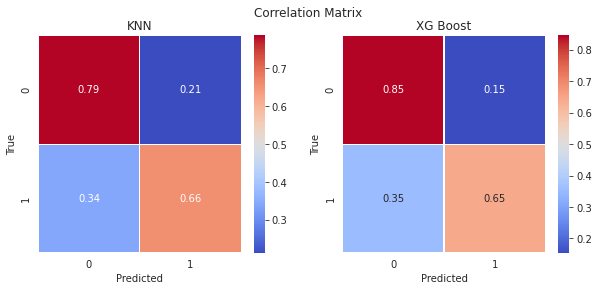

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
fig.suptitle('Correlation Matrix')

sns.heatmap(knn_corr, annot=True, linewidths=.1, cmap='coolwarm', ax=ax[0])
ax[0].set_title('KNN')
ax[0].set_ylabel('True')
ax[0].set_xlabel('Predicted')

sns.heatmap(xgb_corr, annot=True, linewidths=.1, cmap='coolwarm', ax=ax[1])
ax[1].set_title('XG Boost')
ax[1].set_ylabel('True')
ax[1].set_xlabel('Predicted')


plt.show()

- O modelo KNN foi capaz de prever corretamente 80% dos clientes que provavelmente deixarão a empresa, enquanto o modelo XG Boost (que ficou em segundo lugar na Recall) previu apenas 58% corretamente;
- Isto nos leva a concluir que o modelo XG Boost é útil para prever os casos de clientes que não pretendem deixar a empresa (que não é o que queremos), portanto o melhor modelo a ser escolhido é o KNN;

##### Uso do modelo de base
- Se a Telco decidisse não usar o melhor modelo de Aprendizagem de Máquina (KNN) e, em vez disso, usar o modelo Baseline, o Recall seria:

In [110]:
base_classifier.fit(X_train_smote,y_train_smote)

y_predBLC = base_classifier.predict(X_test)

blc_corr = confusion_matrix(y_test, y_predBLC, normalize='true')

print(classification_report(y_test, y_predBLC))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1301
           1       0.00      0.00      0.00       457

    accuracy                           0.74      1758
   macro avg       0.37      0.50      0.43      1758
weighted avg       0.55      0.74      0.63      1758



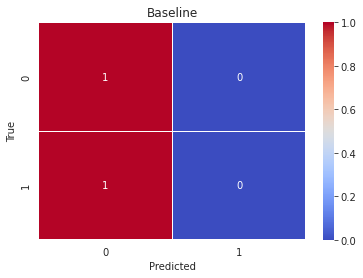

In [111]:
ax = sns.heatmap(blc_corr, annot=True, linewidths=.1, cmap='coolwarm')
ax.set_title('Baseline')
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
plt.show()

# 6. Conclusão

## Business Impact:

In [112]:
print("A receita da Telco no mês passado foi de USD {}".format(
    df['MonthlyCharges'].sum()))

A receita da Telco no mês passado foi de USD 455661.0


In [113]:
print('A receita perdida devido ao Churn esse mês foi de USD {}'.format(
    df[df['Churn']==1]['MonthlyCharges'].sum()))

A receita perdida devido ao Churn esse mês foi de USD 139130.85


In [114]:
print('Com nosso modelo de Machine Learning prevendo 80% das pessoas que estariam prestes a deixar a compania, seríamos capazes de manter um montante de USD {}'.format(round(
    df[df['Churn']==1]['MonthlyCharges'].sum()*0.8,2)))

Com nosso modelo de Machine Learning prevendo 80% das pessoas que estariam prestes a deixar a compania, seríamos capazes de manter um montante de USD 111304.68


In [115]:
print('Com o modelo de Base predizendo 48% das pessoas que estariam inclinadas a sair, seríamos capazes de manter USD {} na empresa'.format(round(
    df[df['Churn']==1]['MonthlyCharges'].sum()*0.48,2)))

Com o modelo de Base predizendo 48% das pessoas que estariam inclinadas a sair, seríamos capazes de manter USD 66782.81 na empresa


- Assumindo que neste mês a Telco adquira o mesmo número de clientes que no mês passado, então:

In [116]:
woML = df[df['tenure']==1]['MonthlyCharges'].sum()+df[df['Churn']==0]['MonthlyCharges'].sum()
print('A possível receita esse mês sem o modelo de Machine Learning é USD {}'.format(woML))

A possível receita esse mês sem o modelo de Machine Learning é USD 347477.95


In [117]:
wBL = df[df['tenure']==1]['MonthlyCharges'].sum()+df[df['Churn']==0]['MonthlyCharges'].sum()+round(df[df['Churn']==1]['MonthlyCharges'].sum()*0.48,2)
print('A possóvel receita este mês com o modelo de base é USD {}'.format(wBL))

A possóvel receita este mês com o modelo de base é USD 414260.76


In [118]:
wML = df[df['tenure']==1]['MonthlyCharges'].sum()+df[df['Churn']==0]['MonthlyCharges'].sum()+round(df[df['Churn']==1]['MonthlyCharges'].sum()*0.8,2)
print('A receita possível este mês com o modelo de Machine Learning é USD {}'.format(wML))

A receita possível este mês com o modelo de Machine Learning é USD 458782.63


In [119]:
print("O aumento possível do lucro da Telco com nosso projeto de Machine Learning seria {}%".format(round(((wML-wBL)/wBL)*100,2)))

O aumento possível do lucro da Telco com nosso projeto de Machine Learning seria 10.75%


- Este valor pode parecer absurdo para o crescimento da renda em um único mês, mas isto porque o valor de rotatividade dos dados também é absurdo em comparação com a média real de 3,2%.

In [120]:
print('A taxa de Churn da Telco é {}%'.format(round(df['Churn'].value_counts(normalize=True).loc[1]*100,2)))

A taxa de Churn da Telco é 26.58%
